Fittando curvas aos graficos digitalizados.

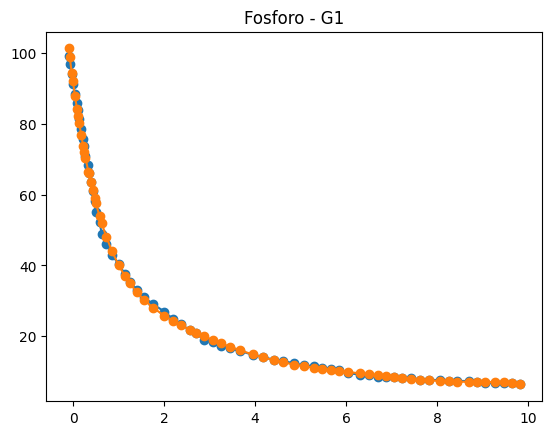

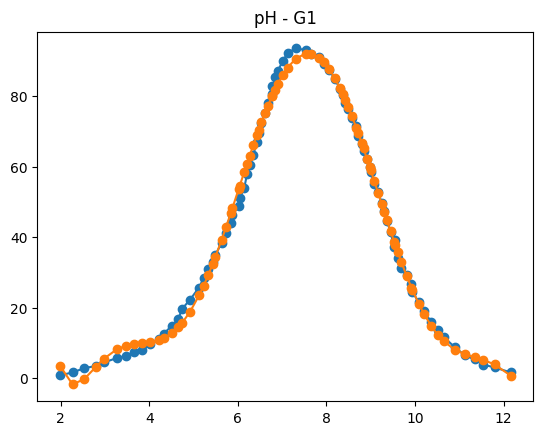

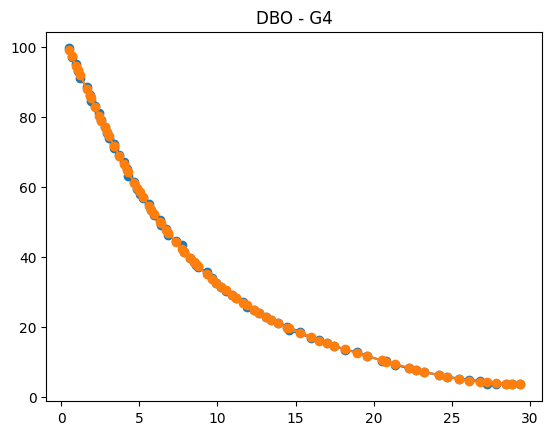

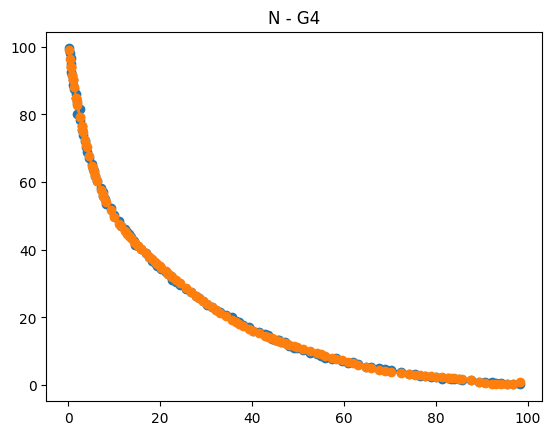

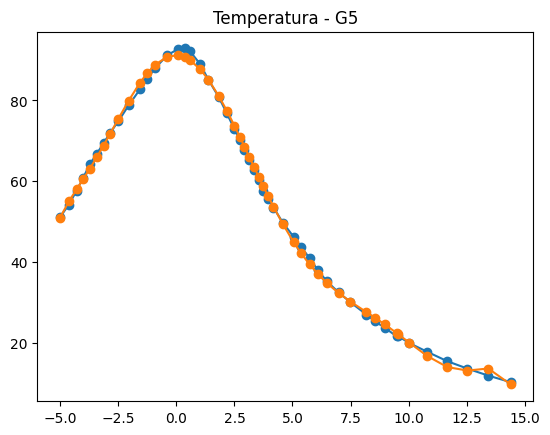

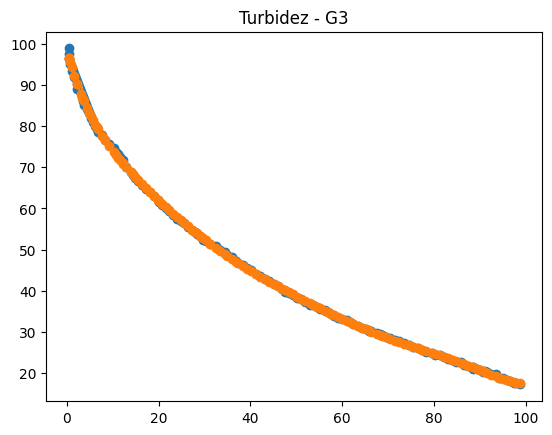

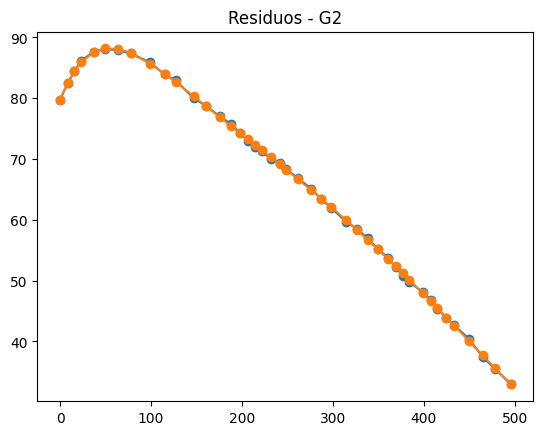

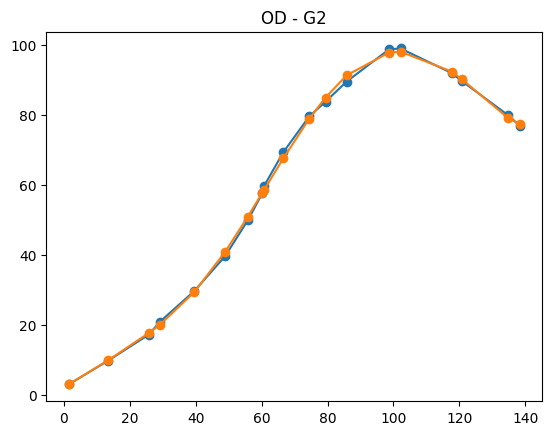

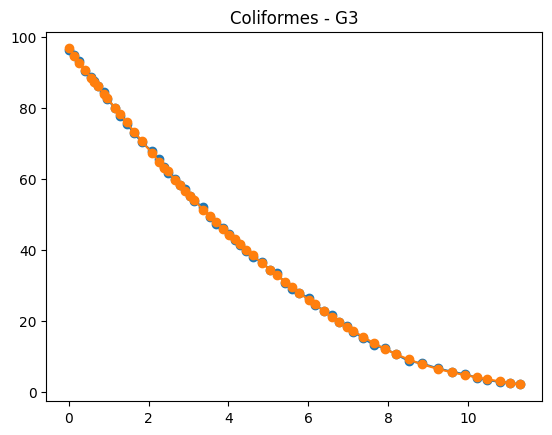

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
xl = pd.ExcelFile("Graficos Digitalizados.xlsx")
sheets = xl.sheet_names
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
fosforo = xl.parse(sheets[0])
ph = xl.parse(sheets[1])
dbo = xl.parse(sheets[2])
n = xl.parse(sheets[3])
temperatura = xl.parse(sheets[4])
turbidez = xl.parse(sheets[5])
residuos = xl.parse(sheets[6])
residuos.sort_values(residuos.columns[0], inplace=True)
od = xl.parse(sheets[7])
coliformes = xl.parse(sheets[8])

coliformes = coliformes.iloc[:, 0:2]
od = od.tail(-1)
od = od.iloc[:, 1:]
# coliformes = coliformes.astype('float64').sort_values('x')

cols = [fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
funcs = {}

i = 0
for indicador in cols:
    indicador.rename(columns={indicador.columns[0]: 'x', indicador.columns[1]: 'y'}, inplace=True)
    indicador = indicador.astype('float64')
    grau = 8
    if i == 8:
        indicador['x'] = np.log(indicador['x'])
    coefficients = np.polyfit(indicador['x'], indicador['y'], grau)
    func = np.poly1d(coefficients)
    name = sheets[i].split(' - ')[0].lower() # to lower
    funcs[name] = func
    plt.plot(indicador['x'], indicador['y'], indicador['x'], func(indicador['x']), marker='o')
    plt.title(sheets[i])
    plt.show()
    i += 1


In [147]:
print(funcs.keys())

dict_keys(['fosforo', 'ph', 'dbo', 'n', 'temperatura', 'turbidez', 'residuos', 'od', 'coliformes'])


In [148]:
df  = pd.read_excel('SPRA04850_2017_2022.xlsx')
filtrado  = df[['Data Coleta','Parametro','Valor','Unidade']]
filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
filtrado['Data Coleta'] = filtrado['Data Coleta'].dt.strftime('%y-%m')
filtrado.sort_values(by=['Data Coleta'], inplace=True)

/tmp/ipykernel_3685/2549625590.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3685/2549625590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3685/2549625590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [149]:
ph = filtrado.loc[filtrado['Parametro'] == 'pH']
ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
dbo = filtrado.loc[filtrado['Parametro'] == 'DBO (5, 20)']
dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
fosforo = filtrado.loc[filtrado['Parametro'] == 'Fósforo Total']
fosforo['Valor'] = fosforo['Valor'].str.replace(",",".").astype(float)
nitrogenio_t = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Total']
nitrogenio_t['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

/tmp/ipykernel_3685/1867526216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1867526216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1867526216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [150]:


nitrogenio_k = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Kjeldahl']
nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)

nitrogenio_a = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Amoniacal']
nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)


nitrogenio_ni = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrito']
nitrogenio_ni['Valor'] = nitrogenio_ni['Valor'].str.replace(",",".").astype(float)
  

nitrogenio_na = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrato']
nitrogenio_na['Valor'] = nitrogenio_na['Valor'].str.replace(",",".").astype(float)

nitrogenio_t2 = nitrogenio_k.reset_index(drop=True)
nitrogenio_t2['Valor'] = nitrogenio_k['Valor'].reset_index(drop=True) +  nitrogenio_ni['Valor'].reset_index(drop=True) + nitrogenio_na['Valor'].reset_index(drop=True)

nitrogenio_t = pd.concat([nitrogenio_t, nitrogenio_t2], axis=0)
nitrogenio_t.sort_values(by=['Data Coleta'], inplace=True)

/tmp/ipykernel_3685/1532397611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1532397611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1532397611.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_3685/588483190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/588483190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/588483190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Text(0.5, 1.0, 'delta Temperatura')

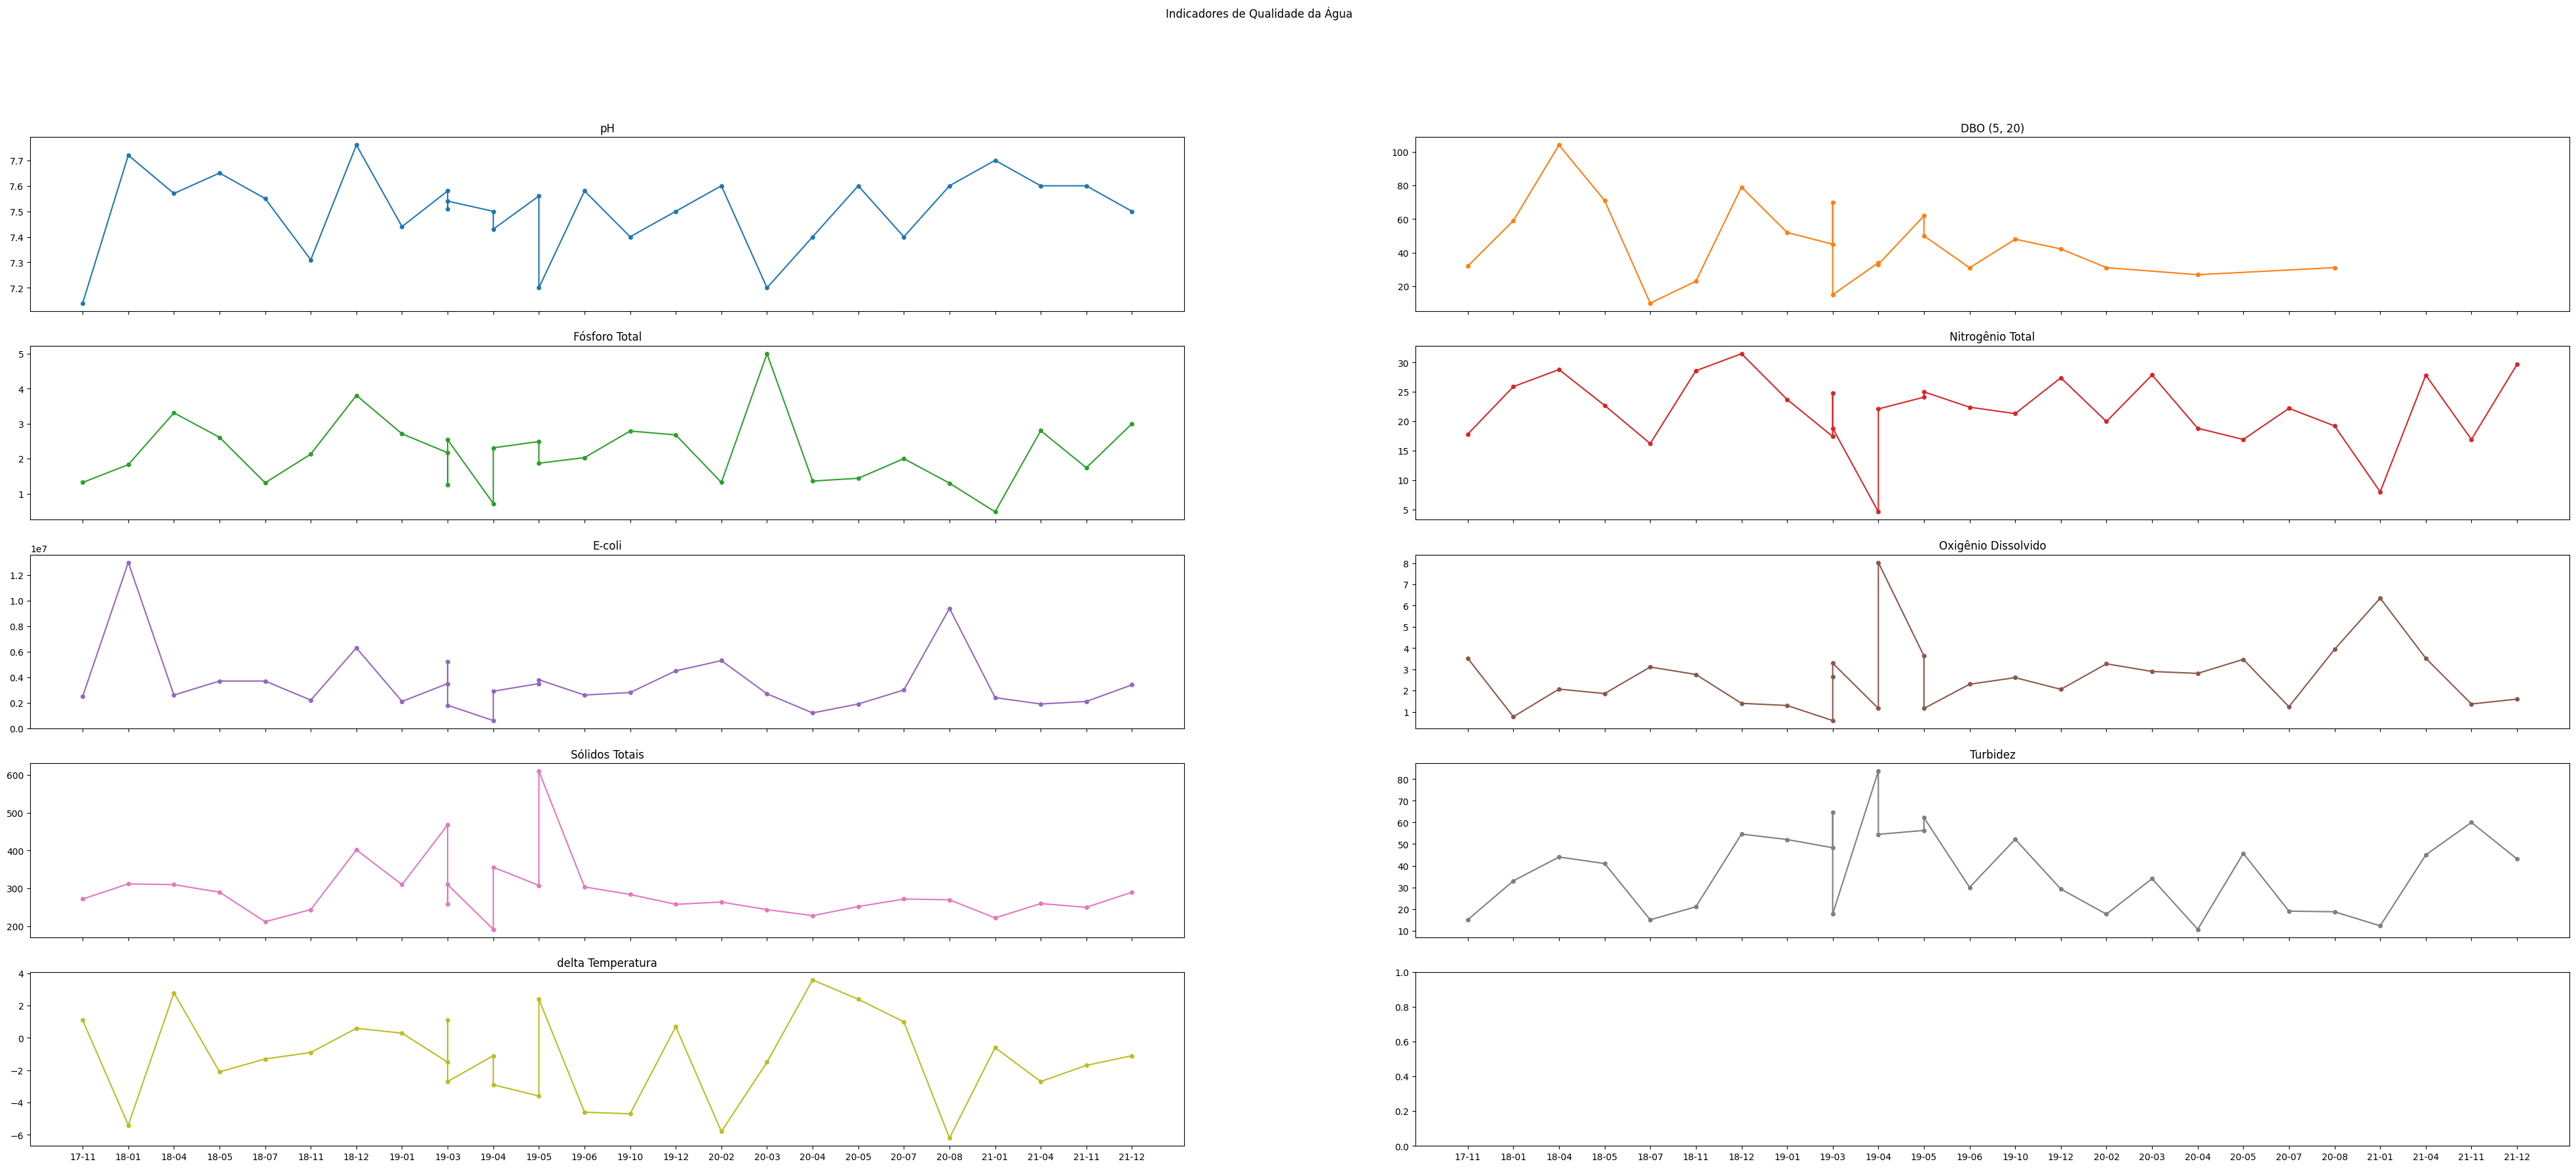

In [151]:
coliformes = filtrado.loc[filtrado['Parametro'] == "Escherichia coli**"]
coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
oxigenio = filtrado.loc[filtrado['Parametro'] == 'Oxigênio Dissolvido']
oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
solidos = filtrado.loc[filtrado['Parametro'] == "Sólido Total"]
solidos['Valor'] = solidos['Valor'].str.replace(",",".").astype(float)
turbidez = filtrado.loc[filtrado['Parametro'] == 'Turbidez']
turbidez['Valor'] = turbidez['Valor'].str.replace(",",".").astype(float)
temperatura_agua = filtrado.loc[filtrado['Parametro'] == 'Temperatura da Água']
temperatura_agua['Valor'] = temperatura_agua['Valor'].str.replace(",",".").astype(float)
temperatura_ar = filtrado.loc[filtrado['Parametro'] == 'Temperatura do Ar']
temperatura_ar['Valor'] = temperatura_ar['Valor'].str.replace(",",".").astype(float)

temperatura_delta = pd.DataFrame()
temperatura_delta['Data Coleta'] = temperatura_agua['Data Coleta'].reset_index(drop=True)

temperatura_delta["Valor"] = temperatura_agua['Valor'].reset_index(drop=True) - temperatura_ar['Valor'].reset_index(drop=True)
#plot all indicators 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, 2, figsize=(50, 20), sharex=True)
fig.suptitle('Indicadores de Qualidade da Água')
axs[0, 0].plot(ph['Data Coleta'], ph['Valor'],marker='o',markersize=4)
axs[0, 0].set_title('pH')
axs[0, 1].plot(dbo['Data Coleta'], dbo['Valor'], 'tab:orange',marker='o',markersize=4)
axs[0, 1].set_title('DBO (5, 20)')
axs[1, 0].plot(fosforo['Data Coleta'], fosforo['Valor'], 'tab:green',marker='o',markersize=4)
axs[1, 0].set_title('Fósforo Total')
axs[1, 1].plot(nitrogenio_t['Data Coleta'], nitrogenio_t['Valor'], 'tab:red',marker='o',markersize=4)
axs[1, 1].set_title('Nitrogênio Total')
axs[2, 0].plot(coliformes['Data Coleta'], coliformes['Valor'], 'tab:purple',marker='o',markersize=4)
axs[2, 0].set_title('E-coli')
axs[2, 1].plot(oxigenio['Data Coleta'], oxigenio['Valor'], 'tab:brown',marker='o',markersize=4)
axs[2, 1].set_title('Oxigênio Dissolvido')
axs[3, 0].plot(solidos['Data Coleta'], solidos['Valor'], 'tab:pink',marker='o',markersize=4)
axs[3, 0].set_title('Sólidos Totais')
axs[3, 1].plot(turbidez['Data Coleta'], turbidez['Valor'], 'tab:gray',marker='o',markersize=4)
axs[3, 1].set_title('Turbidez')
axs[4, 0].plot(temperatura_delta['Data Coleta'], temperatura_delta['Valor'], 'tab:olive',marker='o',markersize=4)
axs[4, 0].set_title('delta Temperatura')


para todo dia no qual foram medidos todos os indicadores acima, inserir os valores calculados naquele dia em suas respectivas funções polinomiais treinadas e calcular o IQA daquele dia.

In [152]:
#remove points from other dfs which dont exist in dbo
#[fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
fosforo = fosforo.loc[fosforo['Data Coleta'].isin(dbo['Data Coleta'])]
ph = ph.loc[ph['Data Coleta'].isin(dbo['Data Coleta'])]
nitrogenio_t = nitrogenio_t.loc[nitrogenio_t['Data Coleta'].isin(dbo['Data Coleta'])]
temperatura_delta = temperatura_delta.loc[temperatura_delta['Data Coleta'].isin(dbo['Data Coleta'])]
turbidez = turbidez.loc[turbidez['Data Coleta'].isin(dbo['Data Coleta'])]
solidos = solidos.loc[solidos['Data Coleta'].isin(dbo['Data Coleta'])]
oxigenio = oxigenio.loc[oxigenio['Data Coleta'].isin(dbo['Data Coleta'])]
coliformes = coliformes.loc[coliformes['Data Coleta'].isin(dbo['Data Coleta'])]

#create dfs with all indicators as columns
total_df = pd.DataFrame()
total_df['Data Coleta'] = dbo['Data Coleta'].reset_index(drop=True)
total_df['dbo'] = dbo["Valor"].reset_index(drop=True)
total_df['ph'] = ph["Valor"].reset_index(drop=True)
total_df['fosforo'] = fosforo["Valor"].reset_index(drop=True)
total_df['n'] = nitrogenio_t["Valor"].reset_index(drop=True)
total_df['temperatura'] = temperatura_delta["Valor"].reset_index(drop=True)
total_df['turbidez'] = turbidez["Valor"].reset_index(drop=True)
total_df['residuos'] = solidos["Valor"].reset_index(drop=True)
total_df['od'] = oxigenio["Valor"].reset_index(drop=True)
total_df['coliformes'] = coliformes["Valor"].reset_index(drop=True)
#['fosforo', 'ph', 'dbo', 'n', 'temperatura', 'turbidez', 'residuos', 'od', 'coliformes']

In [153]:
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
def restrict_to_range(x, min_value, max_value):
    """
    Restricts the value of x to the range between min_value and max_value.
    """
    return max(min(x, max_value), min_value)

weights = {"fosforo":0.1, "ph":0.12, "dbo":0.10, "n":0.10, "temperatura":0.10, "turbidez":0.08, "residuos":0.08, "od":0.17, "coliformes":0.15}
def calculaIQA(df):
#
    iqas = []
    for i in range(len(df)):
        line = df.iloc[i]
        iqa = 1
        for column in df.columns[1:10]:
            print(column)
            parametro = line[column]
            if column == 'coliformes':
                value = restrict_to_range(parametro,1,1e5)
                value= np.log(value)
            if column == 'ph':
                value = restrict_to_range(parametro,2,12)
            if column == 'temperatura':
                value = restrict_to_range(parametro,-5,20)
            if column == 'turbidez':
                value = restrict_to_range(parametro,0,100)
            if column == 'residuos':
                value = restrict_to_range(parametro,0,500)
            if column == 'od':
                value = restrict_to_range(parametro,0.1,160)
            if column == 'dbo':
                value = restrict_to_range(parametro,0,30)
            if column == 'fosforo':
                value = restrict_to_range(parametro,0,10)
            if column == 'n':
                value = restrict_to_range(parametro,0,100)
            
            value = round(value, 2)
            final =  funcs[column](value)**weights[column]
            iqa = iqa*final

        iqas.append(iqa)
    
    df['IQA'] = iqas
        


    
        

        
        
    
calculaIQA(total_df)
# total_df
total_df



dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
temperatura
turbidez
residuos
od
coliformes
dbo
ph
fosforo
n
tempera

,Data Coleta,dbo,ph,fosforo,n,temperatura,turbidez,residuos,od,coliformes,IQA
0,17-11,32.0,7.14,1.32,17.80,1.1,15.0,272.0,3.52,2500000.0,16.563727
1,18-01,59.0,7.72,1.83,25.90,-5.4,33.0,312.0,0.77,13000000.0,13.733222
2,18-04,104.0,7.57,3.31,28.80,2.8,44.0,310.0,2.07,2600000.0,13.614245
3,18-05,71.0,7.65,2.61,22.70,-2.1,41.0,290.0,1.86,3700000.0,14.417894
4,18-07,10.0,7.55,1.31,16.20,-1.3,15.0,212.0,3.11,3700000.0,21.053356
5,18-11,23.0,7.31,2.13,28.60,-0.9,21.0,244.0,2.76,2200000.0,16.550244
6,18-12,79.0,7.76,3.81,31.50,0.6,54.6,402.0,1.40,6300000.0,12.989421
7,19-01,52.0,7.44,2.71,23.72,0.3,52.1,310.0,1.30,2100000.0,14.106591
8,19-03,45.0,7.58,2.17,17.40,-1.5,48.3,468.0,0.59,3500000.0,13.865901
9,19-03,70.0,7.51,1.26,24.80,1.1,64.7,258.0,2.65,5200000.0,15.043601


In [154]:
for col in total_df.columns[1:11]:
    plt.figure(figsize=(30,10))
    plt.title(col)
    plt.plot(total_df[total_df.columns[0]], total_df[col])
    plt.xlabel(total_df.columns[0])
    plt.ylabel(col)

plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'size'